In [31]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [33]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [34]:
# Use the citipy mocule to determine city based on latitude and longitude
from citipy import citipy

In [35]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [36]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [37]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [38]:
# Import the datetime module from the datetime library
from datetime import datetime

In [39]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval                        ")
print("------------------------------------------------")

# Create counters
record_counter = 1
set_count = 1

Beginning Data Retrieval                        
------------------------------------------------


In [40]:
# Loop through all the cities in our list
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | atambua
Processing Record 2 of Set 13 | floresta
Processing Record 3 of Set 13 | jamestown
Processing Record 4 of Set 13 | khatanga
Processing Record 5 of Set 13 | punta arenas
Processing Record 6 of Set 13 | tiksi
Processing Record 7 of Set 13 | new norfolk
Processing Record 8 of Set 13 | upernavik
Processing Record 9 of Set 13 | okandja
City not found. Skipping...
Processing Record 10 of Set 13 | mehamn
Processing Record 11 of Set 13 | kodiak
Processing Record 12 of Set 13 | saint-philippe
Processing Record 13 of Set 13 | gwalior
Processing Record 14 of Set 13 | san cristobal
Processing Record 15 of Set 13 | hilo
Processing Record 16 of Set 13 | cidreira
Processing Record 17 of Set 13 | odessa
Processing Record 18 of Set 13 | rikitea
Processing Record 19 of Set 13 | vila franca do campo
Processing Record 20 of Set 13 | korla
Processing Record 21 of Set 13 | chuy
Processing Record 22 of Set 13 | bud
Processing Record 23 of Set 13 | kruisfontein
Processi

In [41]:
len(city_data)

555

In [42]:
# Convert the array of dictionaires to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atambua,-9.1061,124.8925,72.84,83,100,1.43,ID,2021-10-01 19:34:32
1,Floresta,-8.6011,-38.5686,94.51,23,52,19.57,BR,2021-10-01 19:36:38
2,Jamestown,42.0970,-79.2353,69.03,58,75,3.00,US,2021-10-01 19:34:24
3,Khatanga,71.9667,102.5000,27.32,93,100,3.94,RU,2021-10-01 19:32:41
4,Punta Arenas,-53.1500,-70.9167,44.71,42,40,26.46,CL,2021-10-01 19:36:39
5,Tiksi,71.6872,128.8694,27.10,87,84,3.60,RU,2021-10-01 19:36:40
6,New Norfolk,-42.7826,147.0587,55.76,85,100,2.33,AU,2021-10-01 19:36:40
7,Upernavik,72.7868,-56.1549,32.72,98,100,12.88,GL,2021-10-01 19:36:41
8,Mehamn,71.0357,27.8492,46.58,66,40,14.97,NO,2021-10-01 19:36:41
9,Kodiak,57.7900,-152.4072,45.91,61,1,5.75,US,2021-10-01 19:33:18


In [43]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atambua,ID,2021-10-01 19:34:32,-9.1061,124.8925,72.84,83,100,1.43
1,Floresta,BR,2021-10-01 19:36:38,-8.6011,-38.5686,94.51,23,52,19.57
2,Jamestown,US,2021-10-01 19:34:24,42.0970,-79.2353,69.03,58,75,3.00
3,Khatanga,RU,2021-10-01 19:32:41,71.9667,102.5000,27.32,93,100,3.94
4,Punta Arenas,CL,2021-10-01 19:36:39,-53.1500,-70.9167,44.71,42,40,26.46
5,Tiksi,RU,2021-10-01 19:36:40,71.6872,128.8694,27.10,87,84,3.60
6,New Norfolk,AU,2021-10-01 19:36:40,-42.7826,147.0587,55.76,85,100,2.33
7,Upernavik,GL,2021-10-01 19:36:41,72.7868,-56.1549,32.72,98,100,12.88
8,Mehamn,NO,2021-10-01 19:36:41,71.0357,27.8492,46.58,66,40,14.97
9,Kodiak,US,2021-10-01 19:33:18,57.7900,-152.4072,45.91,61,1,5.75


In [44]:
# Create the output file (csv)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

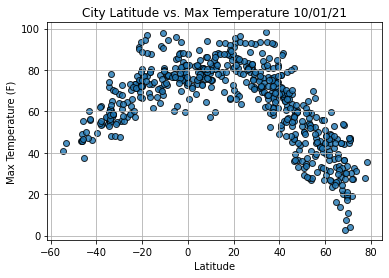

In [52]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
            
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()


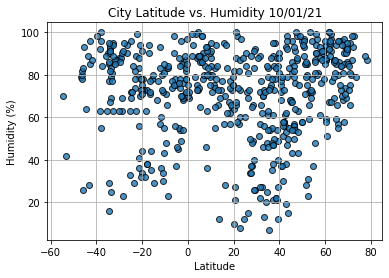

In [53]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

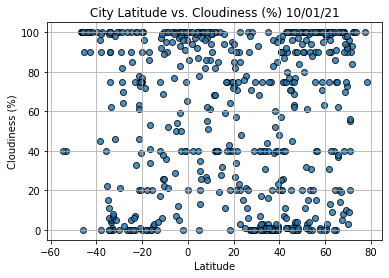

In [54]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

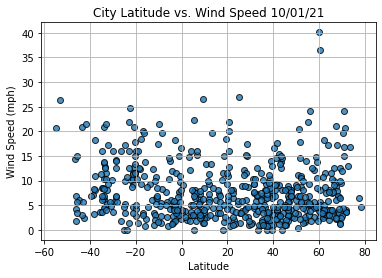

In [55]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()